In [49]:
import pandas as pd
pd.set_option('max_colwidth', 100)
import seaborn as sns
sns.set()

In [50]:
df = pd.read_csv('./reddit_questions.tsv', sep='\t')
df.head(1)

,Unnamed: 0,op_id,op_gender,post_id,q,is_qy,q_score,oov
0,1441289,BendyZebra,W,1441289,"Its horrible being severe, isnt it?",False,2.091765e-07,False


In [9]:
non_qy = df[~df.is_qy]
non_qy = non_qy[qy]
non_qy.head()

,Unnamed: 0,op_id,op_gender,post_id,q,is_qy,q_score,oov
0,1441289,BendyZebra,W,1441289,"Its horrible being severe, isnt it?",False,2.091765e-07,False
1,322969,Druston,W,322969,I mean seriously?,False,1.640028e-06,False
2,1188410,kamikaze_puppy,W,1188410,Ask Where did you grow up?,False,1.901941e-05,False
3,1207387,fruitjerky,W,1207387,Haha?,False,2.711913e-05,False
4,1210910,LifeAfterAbuse,W,1210910,If a friend told you her husband was treating ...,False,2.988395e-05,False


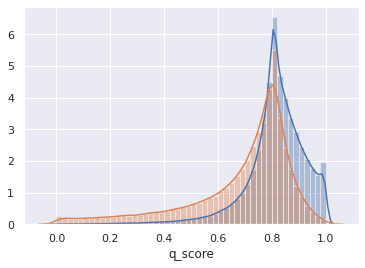

In [16]:
sns.distplot(non_qy[non_qy.op_gender == 'M'].q_score)
sns.distplot(non_qy[non_qy.op_gender == 'W'].q_score)

In [40]:
non_qy.sort_values('q_score', inplace=True)
female = non_qy[non_qy.op_gender == 'W'].head(5000)
male = non_qy[non_qy.op_gender == 'M'].tail(5000)
female.sample(20)

/nas/home/jwei/anaconda3/envs/biases/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,op_id,op_gender,post_id,q,is_qy,q_score,oov
6373,153586,insomniac365,W,153586,"Man typing all that out is it any wonder there are so many body issues, sex is taboo, and teen p...",False,0.300940,False
6807,447138,iloveteax,W,447138,"I mean, why else would a grown woman wear her hair half-up, half-down like an 11-year-old?",False,0.314432,False
2263,1038893,thefemaledylan,W,1038893,"Its probably because youre scared of rejection, right?",False,0.135204,False
881,1185692,squinkie,W,1185692,"I agree that breaking off healthy friendships is a bad thing in a relationship, but was this fri...",False,0.050699,False
100,1200113,hopewings,W,1200113,"Yeah, sounds pretty crazy, doesnt it?",False,0.003461,False
4894,1201518,adga77,W,1201518,"Anxiety isnt easy, but what is she doing to help with that on her end?",False,0.251874,False
4098,1214194,Celany,W,1214194,What does he do for you?,False,0.223935,False
3647,1304657,AwkwardAndrea,W,1304657,what bikini are you wearing that it covers more than undies?,False,0.203259,False
4696,1187182,nevertruly,W,1187182,And guess how I now feel about those older guys who wanted to date me?,False,0.245788,False
259,435489,BlehFuckingBleh,W,435489,"Lets be healthy, eh?",False,0.011053,False


In [46]:
df = pd.concat([female, male])
df['gpt'] = df.q.apply(lambda x: x + '<|endoftext|>')
df[['op_gender', 'gpt']].to_csv('questions_5000_MW.tsv', sep='\t', header=None, index=False)

In [47]:
!head ./questions_5000_MW.tsv

W	Its horrible being severe, isnt it?<|endoftext|>
W	I mean seriously?<|endoftext|>
W	Ask Where did you grow up?<|endoftext|>
W	Haha?<|endoftext|>
W	If a friend told you her husband was treating her this way, what would you say?<|endoftext|>
W	EDIT: I was reading some of the other comments and realized this is your middle child, you oldest hasnt gotten hers yet?<|endoftext|>
W	Why did you leave?<|endoftext|>
W	Have you ever seen the bloody mess that many new mothers nipples are, or when their kids begin to teethe?<|endoftext|>
W	* Are you not, uh, a LOT more outraged by this than you come across?<|endoftext|>
W	How do you make ends meet?<|endoftext|>
